# Thématique 4 - Analyse bivariée mixte

### Importation des librairies

In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data pre-processing

In [41]:
# Préparation du fichier de données
filepath = "../data"
filename = "SalairesData.csv"
file = os.path.join(filepath, filename)

# Lecture des données
df_original = pd.read_csv(file, delimiter=";")
df = df_original.copy()

df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Extraction de l'en-tête
header = list(df.columns)

# Extraction des données sans l'en-tête
data = df.to_numpy()

# Affichage des indicateurs de positions et de dispersions
df.describe()

,Salaire,Age
count,130.000000,130.000000
mean,32.038462,33.200000
std,26.085252,11.999612
min,18.000000,18.000000
25%,21.000000,23.000000
50%,23.000000,30.500000
75%,26.000000,42.000000
max,140.000000,59.000000


Ce jeu de données comptabilise des données sur les salariés d'une entreprise et recensse différentes caractéristiques, notamment l'âge et le salaire en tant que variables quantitatives, mais aussi le sexe, l'établissement auquel ils sont rattachés et la catégorie socio-professionnelle. Ici, nous comptons 130 salariés et sur ces 130 individus différents, le salaire annuel moyen est de 32 000€ pour une moyenne d'âge de 33ans. De plus, les valeurs non quantitatives ne sont pas affichées par describe.

In [42]:
df.head()

,Sexe,Salaire,Categorie,Age,Etablissement
0,H,140,CS,58,A
1,F,120,CS,55,A
2,H,118,CS,50,C
3,H,117,CS,44,C
4,H,117,CS,45,B


In [43]:
df.tail()

,Sexe,Salaire,Categorie,Age,Etablissement
125,F,18,OE,18,B
126,H,18,OE,19,A
127,H,18,OE,20,A
128,H,18,OE,18,A
129,F,18,OE,18,B


In [44]:
df.shape

(130, 5)

In [45]:
df.dtypes

Sexe             object
Salaire           int64
Categorie        object
Age               int64
Etablissement    object
dtype: object

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sexe           130 non-null    object
 1   Salaire        130 non-null    int64 
 2   Categorie      130 non-null    object
 3   Age            130 non-null    int64 
 4   Etablissement  130 non-null    object
dtypes: int64(2), object(3)
memory usage: 5.2+ KB


In [47]:
# Changement de type
df.Sexe = df["Sexe"].astype("category")
df.Categorie = df["Categorie"].astype("category")
df.Prescription = df["Etablissement"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sexe           130 non-null    category
 1   Salaire        130 non-null    int64   
 2   Categorie      130 non-null    category
 3   Age            130 non-null    int64   
 4   Etablissement  130 non-null    object  
dtypes: category(2), int64(2), object(1)
memory usage: 3.7+ KB


/tmp/ipykernel_8315/618065425.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Prescription = df["Etablissement"].astype("category")


In [48]:
df.columns

Index(['Sexe', 'Salaire', 'Categorie', 'Age', 'Etablissement'], dtype='object')

Explication des variables :
- Sexe : Sexe de l'mployé
- Salaire : Salaire de l'employé
- Categorie : Catégorie socio-professionnelle de l'employé
- Age : Age de l'employé
- Etablissement : Etablissement auquel l'employé est rattaché

In [49]:
df.isnull().sum()

Sexe             0
Salaire          0
Categorie        0
Age              0
Etablissement    0
dtype: int64

Le jeu de données n'a pas l'air de présenter de données manquantes.

In [50]:
list_col = df.columns

for col in list_col: 
    print('{} :{} ' . format(col.upper(), df[col].unique()))

SEXE :['H', 'F']
Categories (2, object): ['F', 'H'] 
SALAIRE :[140 120 118 117 115 114 113  95  60  58  56  55  50  49  45  43  42  38
  35  32  30  28  27  26  25  24  23  22  21  20  19  18] 
CATEGORIE :['CS', 'CM', 'OE']
Categories (3, object): ['CM', 'CS', 'OE'] 
AGE :[58 55 50 44 45 42 51 59 56 48 40 39 37 35 33 38 32 54 52 29 27 28 30 34
 47 31 24 25 22 41 21 20 23 19 18] 
ETABLISSEMENT :['A' 'C' 'B'] 


In [51]:
df[['Sexe','Categorie']].value_counts()

Sexe  Categorie
H     OE           66
F     OE           34
H     CM           17
      CS            8
F     CM            3
      CS            2
Name: count, dtype: int64

In [52]:
print(df)

    Sexe  Salaire Categorie  Age Etablissement
0      H      140        CS   58             A
1      F      120        CS   55             A
2      H      118        CS   50             C
3      H      117        CS   44             C
4      H      117        CS   45             B
..   ...      ...       ...  ...           ...
125    F       18        OE   18             B
126    H       18        OE   19             A
127    H       18        OE   20             A
128    H       18        OE   18             A
129    F       18        OE   18             B

[130 rows x 5 columns]


## Variable Catégorie

### Décomposition de la variance

In [53]:
import pandas as pd

# Calculs préparatoires
eff_total = df['Salaire'].describe()['count']
mean_total = df['Salaire'].describe()['mean']
var_total = df['Salaire'].describe()['std'] * df['Salaire'].describe()['std'] * (eff_total - 1) / eff_total

# Initialisation de variables
var_intra = 0 # Variance intra-classes
var_inter = 0 # Variance inter-classes

# Initialisation de la liste pour les données du tableau
data = []

# Pour chaque catégorie
for site in df['Categorie'].unique():
    # Initialisation des données du site à traiter
    df_site = df[df['Categorie'] == site]

    # Récapitulatif sur les données du site
    list_site = df_site['Salaire']
    eff_site = list_site.describe()['count']
    mean_site = list_site.describe()['mean']
    var_site = sum((i - mean_site) ** 2 for i in list_site) / eff_site
    m_site = df_site['Salaire'].describe()['25%'] - 1.5*(df_site['Salaire'].describe()['75%'] - df_site['Salaire'].describe()['25%'])
    M_site = df_site['Salaire'].describe()['75%'] + 1.5*(df_site['Salaire'].describe()['75%'] - df_site['Salaire'].describe()['25%'])

    # Ajouter les informations dans le tableau
    data.append({
        "Site": site,
        "Effectif": eff_site,
        "Moyenne": mean_site,
        "Variance": var_site,
        "Médiane": list_site.describe()['50%'],
        "Q1": list_site.describe()['25%'],
        "Q3": list_site.describe()['75%'],
        "m": m_site,
        "M": M_site
    })

    # Mise à jour des variances
    var_intra += eff_site * var_site
    var_inter += eff_site * ((mean_site - mean_total) ** 2)

# Mise à jour des variances
var_intra /= eff_total
var_inter /= eff_total

# Créer le DataFrame avec les données
df_result = pd.DataFrame(data)

# Afficher le tableau
print(df_result)

# Afficher les calculs finaux
print("\nVariance intra    =", var_intra)
print("Variance inter    =", var_inter)
print("Somme inter+intra =", var_intra + var_inter)
print("Rapport           =", var_inter / var_total)

  Site  Effectif  Moyenne  Variance  Médiane      Q1      Q3       m       M
0   CS      10.0   116.40  105.2400    116.0  114.25  117.75  109.00  123.00
1   CM      20.0    41.40  128.9400     42.5   29.50   50.00   -1.25   80.75
2   OE     100.0    21.73    5.9771     22.0   20.00   24.00   14.00   30.00

Variance intra    = 32.53007692307692
Variance inter    = 642.6761360946745
Somme inter+intra = 675.2062130177513
Rapport           = 0.9518220118596247


### Boîtes de Tukey

/tmp/ipykernel_8315/2735976106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categorie', y='Salaire', data=df, showmeans=True, meanprops={'marker':'x','markeredgecolor':'black','markersize':'8'}, palette=["r", "g", "b"])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


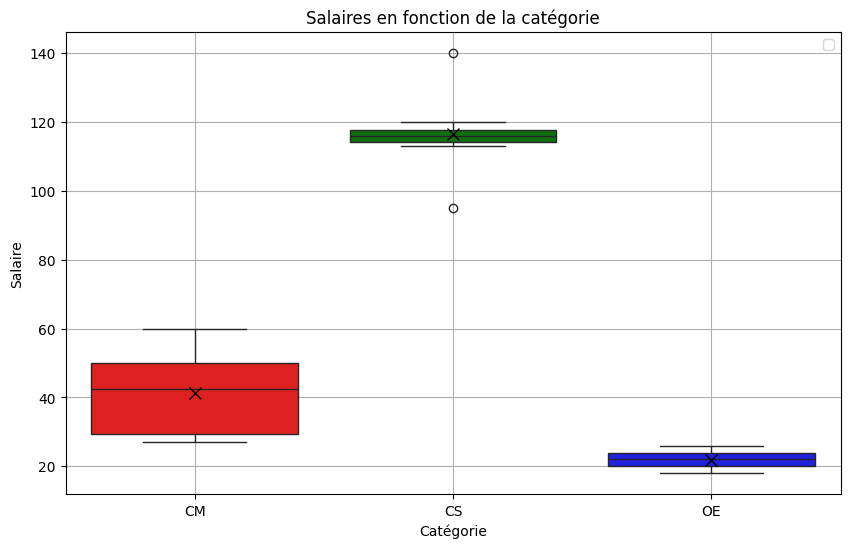

In [54]:
# Création d'un graphique avec des boîtes de Tuckey pour chaque catégorie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categorie', y='Salaire', data=df, showmeans=True, meanprops={'marker':'x','markeredgecolor':'black','markersize':'8'}, palette=["r", "g", "b"])
plt.title('Salaires en fonction de la catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Salaire')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

Les indicateurs de tendance (moyenne et médiane) augmente naturellement avec la catégorie. Les deux indicateurs sont à peu près égaux, ce qui implique une distribution symétrique des salaires de part et d'autre de la tendance centrale.

On note très peu de dispersion dans les catégories extrêmes. Ce qui signifie qu'il n'y a pas beaucoup de différences de salaires dans ces catégories. On note toutefois deux éléments atypiques dans la catégorie CS. A contrario la dispersion est très grande dans la catégorie intermédiaire qui implique certainement des profils très différents.

## Variable Site

### Décomposition de la variance

In [55]:
# Calculs préparatoires
eff_total = df['Salaire'].describe()['count']
mean_total = df['Salaire'].describe()['mean']
var_total = df['Salaire'].describe()['std'] * df['Salaire'].describe()['std'] * (eff_total - 1) / eff_total

# Initialisation de variables
var_intra = 0 # Variance intra-classes
var_inter = 0 # Variance inter-classes

# Initialisation de la liste pour les données du tableau
data = []

# Pour chaque site
for site in df['Etablissement'].unique():
    # Initialisation des données du site à traiter
    df_site = df[df['Etablissement'] == site]

    # Récapitulatif sur les données du site
    list_site = df_site['Salaire']
    eff_site = list_site.describe()['count']
    mean_site = list_site.describe()['mean']
    var_site = sum((i - mean_site) ** 2 for i in list_site) / eff_site
    m_site = df_site['Salaire'].describe()['25%'] - 1.5*(df_site['Salaire'].describe()['75%'] - df_site['Salaire'].describe()['25%'])
    M_site = df_site['Salaire'].describe()['75%'] + 1.5*(df_site['Salaire'].describe()['75%'] - df_site['Salaire'].describe()['25%'])

    data.append({
        "Site": site,
        "Effectif": eff_site,
        "Moyenne": mean_site,
        "Variance": var_site,
        "Médiane": list_site.describe()['50%'],
        "Q1": list_site.describe()['25%'],
        "Q3": list_site.describe()['75%'],
        "m": m_site,
        "M": M_site
    })

    # Mise à jour des variances
    var_intra += eff_site*var_site
    var_inter += eff_site*((mean_site - mean_total)**2)

# Mise à jour des variances
var_intra /= eff_total
var_inter /= eff_total

# Créer le DataFrame avec les données
df_result = pd.DataFrame(data)

# Afficher le tableau
print(df_result)

# Affichage de messages
print("\nVariance intra    = " + str(var_intra))
print("Variance inter    = " + str(var_inter))
print("Somme inter+intra = " + str(var_intra + var_inter))
print("Rapport           = " + str(var_inter / var_total))

  Site  Effectif    Moyenne     Variance  Médiane    Q1     Q3       m       M
0    A      60.0  30.800000   618.026667     22.0  21.0  25.00  15.000  31.000
1    C      30.0  38.133333  1010.382222     24.0  22.0  33.00   5.500  49.500
2    B      40.0  29.325000   472.069375     21.5  19.0  26.25   8.125  37.125

Variance intra    = 663.6603205128207
Variance inter    = 11.545892504930965
Somme inter+intra = 675.2062130177517
Rapport           = 0.017099801930625037


### Boîtes de Tukey

/tmp/ipykernel_8315/4058400615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Etablissement', y='Salaire', data=df, showmeans=True, meanprops={'marker':'x','markeredgecolor':'black','markersize':'8'}, palette=["r", "g", "b"])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


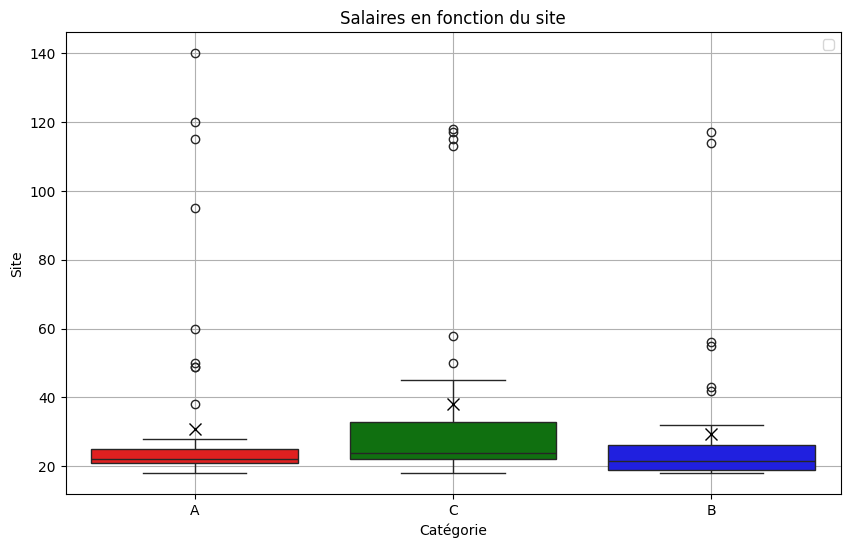

In [56]:
# Création d'un graphique avec des boîtes de Tuckey pour chaque catégorie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Etablissement', y='Salaire', data=df, showmeans=True, meanprops={'marker':'x','markeredgecolor':'black','markersize':'8'}, palette=["r", "g", "b"])
plt.title('Salaires en fonction du site')
plt.xlabel('Catégorie')
plt.ylabel('Site')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

Les indicateurs de tendance (moyenne et médiane) sont du même ordre de grandeur sur les trois sites. 
On note que le salaire médian est à une vingtaine de K€ alors que le salaire moyen est à une trentaine de K€. La distribution des salaires est donc asymétrique. Les petits salaires sont regroupés proches de la médiane tandis que le salaire moyen est attiré par les très hauts salaires. Cette observations est confirmée avec les nombreux  hauts salaires atypiques .

Maintenant, sur quel site vaut-il mieux travailler ? Si l'on souhaite un salaire plus équitable et mieux réparti entre les salariés, le site B sera plus intéressant. Par contre, si l'on souhaite un meilleur salaire, alors il vaut mieux se diriger vers le C car le salaire minimum (Q1) est supérieur aux autres sites, de même que le salaire moyen.